In [2]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
def display(image,cmap=None):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(image,cmap)

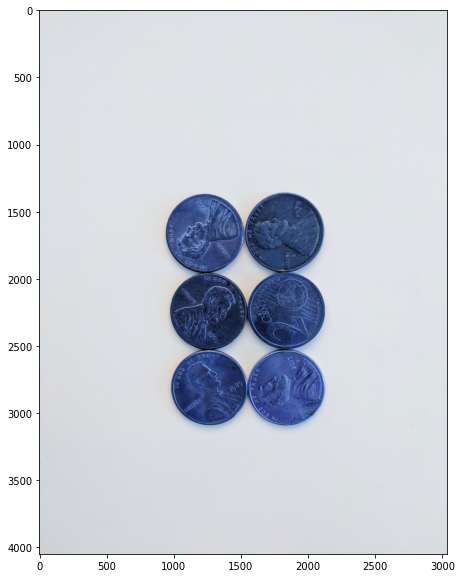

In [5]:
sepCoins=cv2.imread(r'/home/abhilash/Coding/computervision/objectDetectionWithOpenCVandPython/DATA/pennies.jpg')
display(sepCoins)

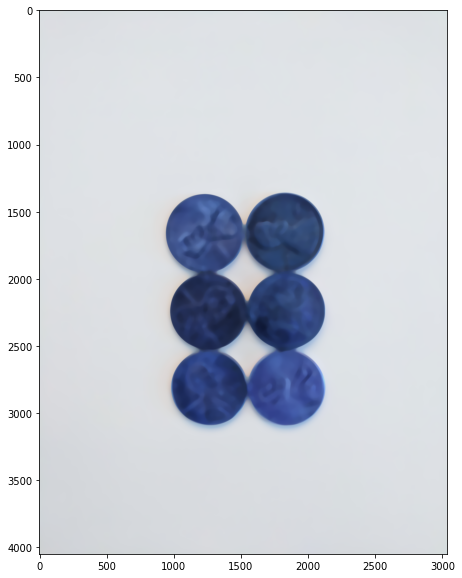

In [12]:
sepCoins=cv2.medianBlur(sepCoins,35)
display(sepCoins)

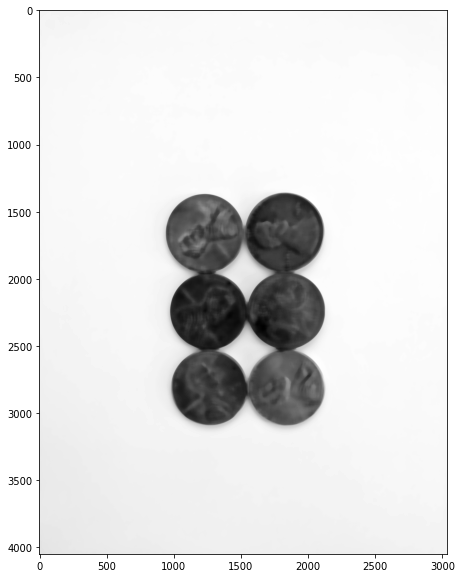

In [11]:
graySepCoins=cv2.cvtColor(sepCoins,cv2.COLOR_BGR2GRAY)
display(graySepCoins,cmap='gray')

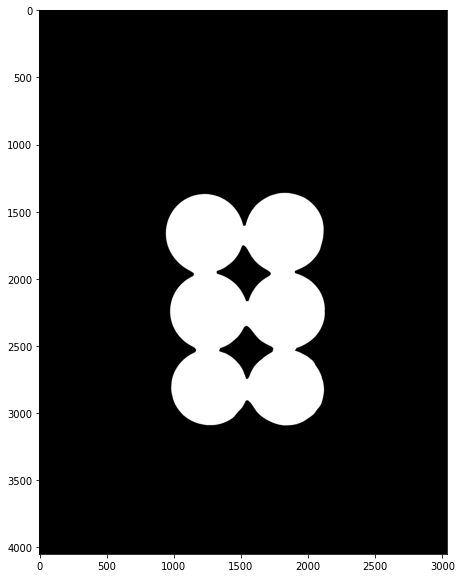

In [15]:
ret, thresh=cv2.threshold(graySepCoins,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
display(thresh,cmap='gray')

In [16]:
# Noise Removal
kernel=np.ones((3,3),np.uint8)
opening=cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)

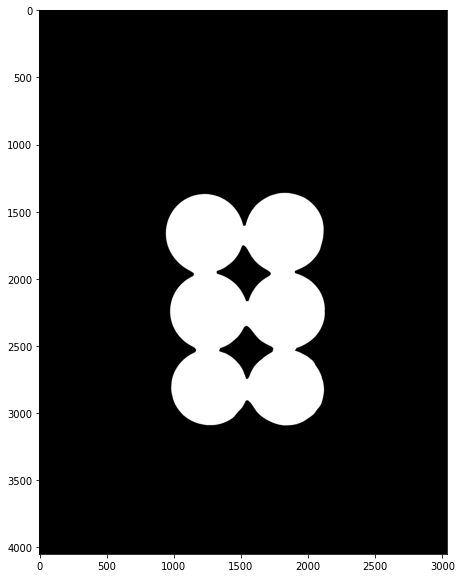

In [17]:
display(opening,cmap='gray')

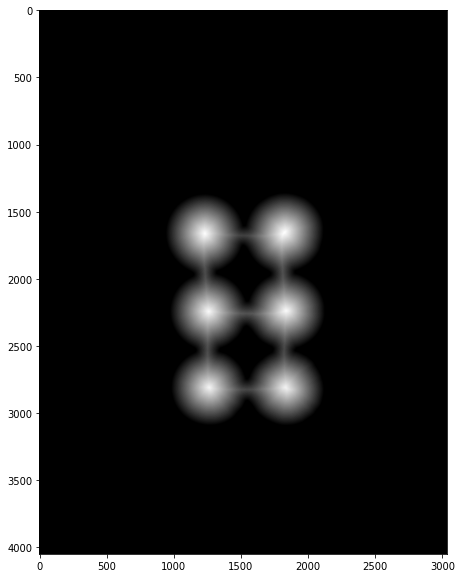

In [18]:
distTransform=cv2.distanceTransform(opening,cv2.DIST_L2,5)
display(distTransform,cmap='gray')

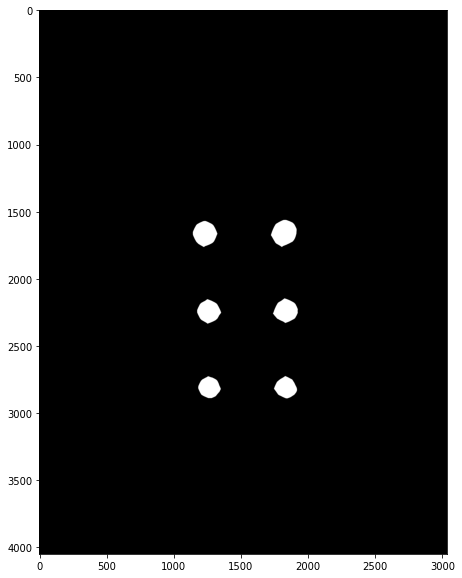

In [19]:
ret,sureFg=cv2.threshold(distTransform,0.7*distTransform.max(),255,0)
display(sureFg,cmap='gray')

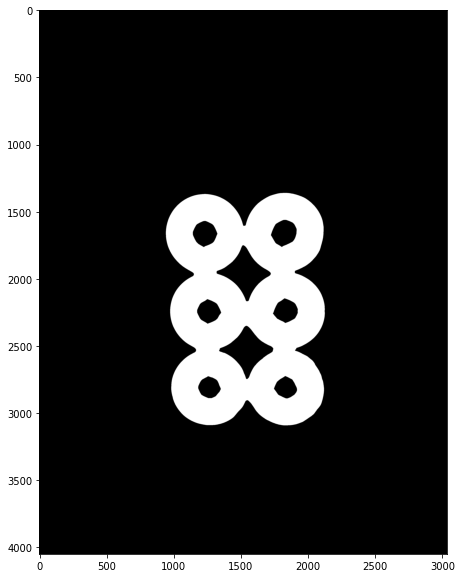

In [20]:
sureFg=np.uint8(sureFg)
unknown=cv2.subtract(thresh,sureFg)
display(unknown,cmap='gray')

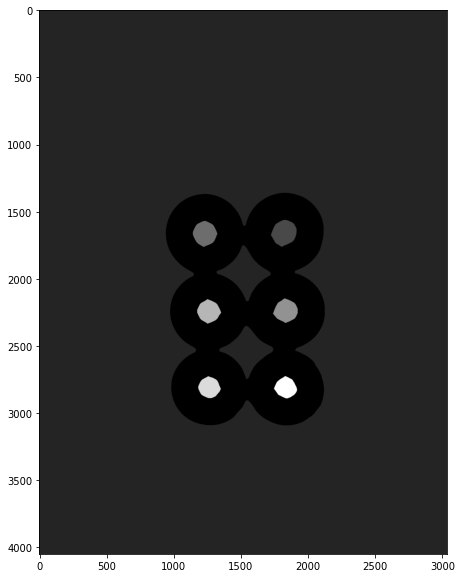

In [21]:
ret,markers=cv2.connectedComponents(sureFg)
markers=markers+1
markers[unknown==255]=0
display(markers,cmap='gray')

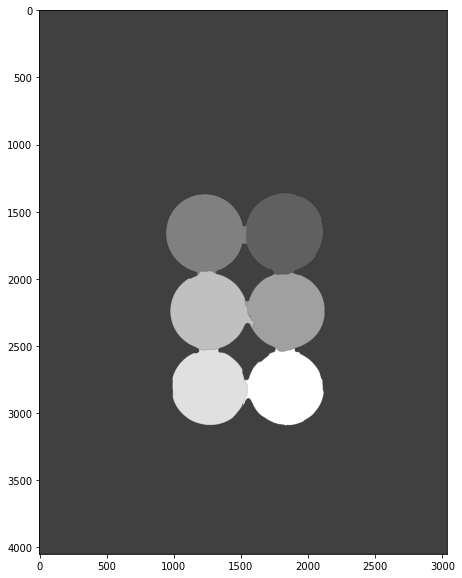

In [23]:
markers=cv2.watershed(sepCoins,markers)
display(markers,cmap='gray')

In [27]:
contours,hierarchy=cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):

    if hierarchy[0][i][3]==-1:
        cv2.drawContours(sepCoins,contours,i,(255,0,0),10)

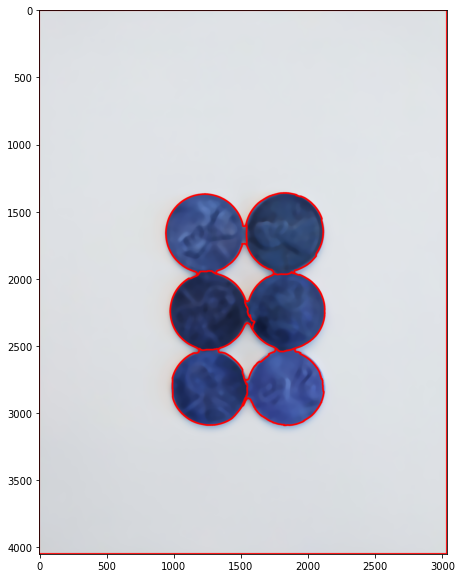

In [28]:
display(sepCoins)